In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv', encoding = 'cp949')

In [3]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [4]:
#결측치 갯수 확인
data.isnull().sum()

#occyp_type (직업 유형)-> 결측치 존재

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [5]:
#직업유형 결측치 '무직'으로 대체
data = data.fillna('nojob')
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,nojob,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,nojob,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [6]:
#occyp_type은 pdf설명에 없어서
data['occyp_type'].value_counts()

nojob                    8171
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [8]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [9]:
#소수 셋째자리까지만
pd.set_option('display.float_format', '{:.3f}'.format)
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000
mean,13228.000,0.429,187306.524,-15958.054,59068.751,1.000,0.225,0.294,0.091,2.197,-26.123,1.520
std,7637.622,0.747,101878.368,4201.589,137475.428,0.000,0.417,0.456,0.288,0.917,16.560,0.702
min,0.000,0.000,27000.000,-25152.000,-15713.000,1.000,0.000,0.000,0.000,1.000,-60.000,0.000
25%,6614.000,0.000,121500.000,-19431.000,-3153.000,1.000,0.000,0.000,0.000,2.000,-39.000,1.000
50%,13228.000,0.000,157500.000,-15547.000,-1539.000,1.000,0.000,0.000,0.000,2.000,-24.000,2.000
75%,19842.000,1.000,225000.000,-12446.000,-407.000,1.000,0.000,1.000,0.000,3.000,-12.000,2.000
max,26456.000,19.000,1575000.000,-7705.000,365243.000,1.000,1.000,1.000,1.000,20.000,0.000,2.000


In [10]:
#child_num(자녀수):  최대 19명, 평균 1명도 안됨
#DAYS_EMPLOYED: 최대  365243-> 양수값은 고용되지 않은 상태, 너무 큰 값이라 이상함
#FLAG_MOVAL: 평균이 1-> 모든 사람이 휴대폰 소지
#가족규모: 최대 20명, 최소 1명
#

In [11]:
#양수값들을 0으로 바꿈
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000
mean,13228.000,0.429,187306.524,-15958.054,-2198.530,1.000,0.225,0.294,0.091,2.197,-26.123,1.520
std,7637.622,0.747,101878.368,4201.589,2370.141,0.000,0.417,0.456,0.288,0.917,16.560,0.702
min,0.000,0.000,27000.000,-25152.000,-15713.000,1.000,0.000,0.000,0.000,1.000,-60.000,0.000
25%,6614.000,0.000,121500.000,-19431.000,-3153.000,1.000,0.000,0.000,0.000,2.000,-39.000,1.000
50%,13228.000,0.000,157500.000,-15547.000,-1539.000,1.000,0.000,0.000,0.000,2.000,-24.000,2.000
75%,19842.000,1.000,225000.000,-12446.000,-407.000,1.000,0.000,1.000,0.000,3.000,-12.000,2.000
max,26456.000,19.000,1575000.000,-7705.000,0.000,1.000,1.000,1.000,1.000,20.000,0.000,2.000


In [12]:
#음수값 양수로 
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    data[feat]=np.abs(data[feat])

In [13]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000,26457.000
mean,13228.000,0.429,187306.524,15958.054,2198.530,1.000,0.225,0.294,0.091,2.197,26.123,1.520
std,7637.622,0.747,101878.368,4201.589,2370.141,0.000,0.417,0.456,0.288,0.917,16.560,0.702
min,0.000,0.000,27000.000,7705.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,6614.000,0.000,121500.000,12446.000,407.000,1.000,0.000,0.000,0.000,2.000,12.000,1.000
50%,13228.000,0.000,157500.000,15547.000,1539.000,1.000,0.000,0.000,0.000,2.000,24.000,2.000
75%,19842.000,1.000,225000.000,19431.000,3153.000,1.000,0.000,1.000,0.000,3.000,39.000,2.000
max,26456.000,19.000,1575000.000,25152.000,15713.000,1.000,1.000,1.000,1.000,20.000,60.000,2.000


In [14]:
data['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [15]:
data['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [16]:
data['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [17]:
data['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [18]:
#DAYS_BIRTH 참고해서 나이 도출
data['age_DAYS_BIRTH'] = round(abs(data['DAYS_BIRTH'])/365,0).astype(np.int32)
data.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age_DAYS_BIRTH
0,0,F,N,N,0,202500.000,Commercial associate,Higher education,Married,Municipal apartment,...,4709,1,0,0,0,nojob,2.000,6.000,1.000,38
1,1,F,N,Y,1,247500.000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1540,1,0,0,1,Laborers,3.000,5.000,1.000,31


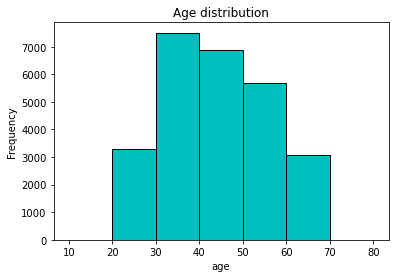

In [19]:
data['age_DAYS_BIRTH'].plot.hist(bins=range(10,81,10),color='c', edgecolor='k')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

In [20]:
data['car'].value_counts()

#car 를 소유하지 않은 사람이 더 많음

N    16410
Y    10047
Name: car, dtype: int64

In [21]:
data['reality'].value_counts()

#부동산을 소유한 사람이 더 많음

Y    17830
N     8627
Name: reality, dtype: int64

In [22]:
# credit 데이터형 변환
data = data.astype({'credit': 'object'})
print(data.dtypes)

index               int64
gender             object
car                object
reality            object
child_num           int64
income_total      float64
income_type        object
edu_type           object
family_type        object
house_type         object
DAYS_BIRTH          int64
DAYS_EMPLOYED       int64
FLAG_MOBIL          int64
work_phone          int64
phone               int64
email               int64
occyp_type         object
family_size       float64
begin_month       float64
credit             object
age_DAYS_BIRTH      int32
dtype: object


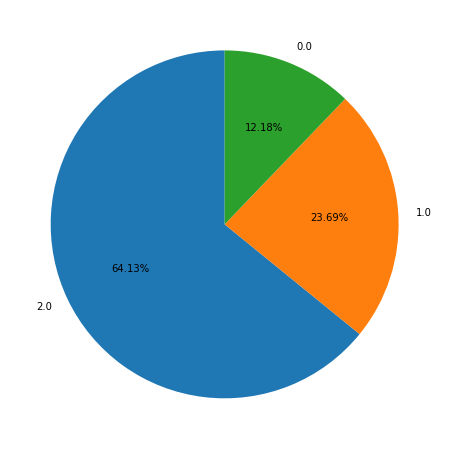

In [23]:
plt.subplots(figsize = (8,8))
plt.pie(data['credit'].value_counts(), labels = data['credit'].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.show()

#신용등급비율의 % = 낮을수록 높은 신용의 신용카드 사용자를 의미-> 낮은 신용의 신용카드 사용자가 많다

In [24]:
#credit_0 = data[data['credit']==0.0]
#credit_1 = data[data['credit']==1.0]
#credit_2 = data[data['credit']==2.0]

#각 credit 별 분리

In [25]:
data['gender'] = data['gender'].replace(['F','M'],[0,1])
data['gender'].value_counts()

0    17697
1     8760
Name: gender, dtype: int64

In [26]:
data['car'] = data['car'].replace(['N','Y'],[0,1])
data['car'].value_counts()

0    16410
1    10047
Name: car, dtype: int64

In [27]:
data['reality'] = data['reality'].replace(['N','Y'],[0,1])
data['reality'].value_counts()

1    17830
0     8627
Name: reality, dtype: int64

In [28]:
data['income_type'] = data['income_type'].replace(['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'],[0,1,2,3,4])
data['income_type'].value_counts()

1    13645
0     6202
3     4449
2     2154
4        7
Name: income_type, dtype: int64

In [29]:
data['edu_type'] = data['edu_type'].replace(['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree' ],[4,3,2,1,0])
data['edu_type'].value_counts()

3    17995
4     7162
2     1020
1      257
0       23
Name: edu_type, dtype: int64

In [30]:
data['family_type'] = data['family_type'].replace(['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow' ],[0,1,2,3,4])
data['family_type'].value_counts()

0    18196
3     3496
1     2123
2     1539
4     1103
Name: family_type, dtype: int64

In [31]:
data['house_type'] = data['house_type'].replace(['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment','Rented apartment','Office apartment'],[0,1,2,3,4,5])
data['house_type'].value_counts()

1    23653
2     1257
0      818
4      429
5      190
3      110
Name: house_type, dtype: int64

In [32]:
y_train=data['credit']
y_train

0       1.000
1       1.000
2       2.000
3       0.000
4       2.000
         ... 
26452   1.000
26453   2.000
26454   2.000
26455   2.000
26456   2.000
Name: credit, Length: 26457, dtype: object

In [33]:
x_train=data.drop(['credit'],axis=1)
x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH
0,0,0,0,0,0,202500.000,0,4,0,0,13899,4709,1,0,0,0,nojob,2.000,6.000,38
1,1,0,0,1,1,247500.000,0,3,1,1,11380,1540,1,0,0,1,Laborers,3.000,5.000,31
2,2,1,1,1,0,450000.000,1,4,0,1,19087,4434,1,0,1,0,Managers,2.000,22.000,52
3,3,0,0,1,0,202500.000,0,3,0,1,15088,2092,1,0,1,0,Sales staff,2.000,37.000,41
4,4,0,1,1,0,157500.000,2,4,0,1,15037,2105,1,0,0,0,Managers,2.000,26.000,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,12079,1984,1,0,0,0,Core staff,4.000,2.000,33
26453,26453,0,0,1,1,180000.000,1,4,2,1,15291,2475,1,0,0,0,nojob,2.000,47.000,42
26454,26454,0,1,0,0,292500.000,1,3,1,2,10082,2015,1,0,0,0,Core staff,2.000,25.000,28
26455,26455,1,0,1,0,171000.000,1,2,3,1,10145,107,1,0,0,0,Laborers,1.000,59.000,28


In [34]:
#1 수익을 부양수로 나누기
f = pd.Series(x_train['income_total']/x_train['family_size'], name = '수익/가족수') ; f

0       101250.000
1        82500.000
2       225000.000
3       101250.000
4        78750.000
           ...    
26452    56250.000
26453    90000.000
26454   146250.000
26455   171000.000
26456    40500.000
Name: 수익/가족수, Length: 26457, dtype: float64

In [35]:
x_train=pd.concat([x_train, f], axis =1) ;x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH,수익/가족수
0,0,0,0,0,0,202500.000,0,4,0,0,...,4709,1,0,0,0,nojob,2.000,6.000,38,101250.000
1,1,0,0,1,1,247500.000,0,3,1,1,...,1540,1,0,0,1,Laborers,3.000,5.000,31,82500.000
2,2,1,1,1,0,450000.000,1,4,0,1,...,4434,1,0,1,0,Managers,2.000,22.000,52,225000.000
3,3,0,0,1,0,202500.000,0,3,0,1,...,2092,1,0,1,0,Sales staff,2.000,37.000,41,101250.000
4,4,0,1,1,0,157500.000,2,4,0,1,...,2105,1,0,0,0,Managers,2.000,26.000,41,78750.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,...,1984,1,0,0,0,Core staff,4.000,2.000,33,56250.000
26453,26453,0,0,1,1,180000.000,1,4,2,1,...,2475,1,0,0,0,nojob,2.000,47.000,42,90000.000
26454,26454,0,1,0,0,292500.000,1,3,1,2,...,2015,1,0,0,0,Core staff,2.000,25.000,28,146250.000
26455,26455,1,0,1,0,171000.000,1,2,3,1,...,107,1,0,0,0,Laborers,1.000,59.000,28,171000.000


In [36]:
#2 총수입을 약 31만씩 5그룹으로
cut_bins = [0, 337000, 647000,957000, 1267000, 1577000 ]

f = pd.cut(x_train['income_total'],bins = cut_bins, labels=["0","1","2","3",'4']).astype('int'); f
x_train=pd.concat([x_train, f], axis =1) ;x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH,수익/가족수,income_total
0,0,0,0,0,0,202500.000,0,4,0,0,...,1,0,0,0,nojob,2.000,6.000,38,101250.000,0
1,1,0,0,1,1,247500.000,0,3,1,1,...,1,0,0,1,Laborers,3.000,5.000,31,82500.000,0
2,2,1,1,1,0,450000.000,1,4,0,1,...,1,0,1,0,Managers,2.000,22.000,52,225000.000,1
3,3,0,0,1,0,202500.000,0,3,0,1,...,1,0,1,0,Sales staff,2.000,37.000,41,101250.000,0
4,4,0,1,1,0,157500.000,2,4,0,1,...,1,0,0,0,Managers,2.000,26.000,41,78750.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,...,1,0,0,0,Core staff,4.000,2.000,33,56250.000,0
26453,26453,0,0,1,1,180000.000,1,4,2,1,...,1,0,0,0,nojob,2.000,47.000,42,90000.000,0
26454,26454,0,1,0,0,292500.000,1,3,1,2,...,1,0,0,0,Core staff,2.000,25.000,28,146250.000,0
26455,26455,1,0,1,0,171000.000,1,2,3,1,...,1,0,0,0,Laborers,1.000,59.000,28,171000.000,0


In [37]:
x_train.columns.values[-1]='총수입등급'

In [38]:
x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH,수익/가족수,총수입등급
0,0,0,0,0,0,202500.000,0,4,0,0,...,1,0,0,0,nojob,2.000,6.000,38,101250.000,0
1,1,0,0,1,1,247500.000,0,3,1,1,...,1,0,0,1,Laborers,3.000,5.000,31,82500.000,0
2,2,1,1,1,0,450000.000,1,4,0,1,...,1,0,1,0,Managers,2.000,22.000,52,225000.000,1
3,3,0,0,1,0,202500.000,0,3,0,1,...,1,0,1,0,Sales staff,2.000,37.000,41,101250.000,0
4,4,0,1,1,0,157500.000,2,4,0,1,...,1,0,0,0,Managers,2.000,26.000,41,78750.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,...,1,0,0,0,Core staff,4.000,2.000,33,56250.000,0
26453,26453,0,0,1,1,180000.000,1,4,2,1,...,1,0,0,0,nojob,2.000,47.000,42,90000.000,0
26454,26454,0,1,0,0,292500.000,1,3,1,2,...,1,0,0,0,Core staff,2.000,25.000,28,146250.000,0
26455,26455,1,0,1,0,171000.000,1,2,3,1,...,1,0,0,0,Laborers,1.000,59.000,28,171000.000,0


In [39]:
#3 교육등급+총수입등급
f = pd.Series(x_train['edu_type']+x_train['총수입등급'],name = '교육+총수입등급');f
x_train=pd.concat([x_train, f], axis =1) ;x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH,수익/가족수,총수입등급,교육+총수입등급
0,0,0,0,0,0,202500.000,0,4,0,0,...,0,0,0,nojob,2.000,6.000,38,101250.000,0,4
1,1,0,0,1,1,247500.000,0,3,1,1,...,0,0,1,Laborers,3.000,5.000,31,82500.000,0,3
2,2,1,1,1,0,450000.000,1,4,0,1,...,0,1,0,Managers,2.000,22.000,52,225000.000,1,5
3,3,0,0,1,0,202500.000,0,3,0,1,...,0,1,0,Sales staff,2.000,37.000,41,101250.000,0,3
4,4,0,1,1,0,157500.000,2,4,0,1,...,0,0,0,Managers,2.000,26.000,41,78750.000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,...,0,0,0,Core staff,4.000,2.000,33,56250.000,0,3
26453,26453,0,0,1,1,180000.000,1,4,2,1,...,0,0,0,nojob,2.000,47.000,42,90000.000,0,4
26454,26454,0,1,0,0,292500.000,1,3,1,2,...,0,0,0,Core staff,2.000,25.000,28,146250.000,0,3
26455,26455,1,0,1,0,171000.000,1,2,3,1,...,0,0,0,Laborers,1.000,59.000,28,171000.000,0,2


In [43]:
#4 업무시작일/총수익등급

f = pd.Series(x_train['DAYS_EMPLOYED']/x_train['총수입등급'], name = '업무시작일/총수입등급') ; f
x_train=pd.concat([x_train, f], axis =1) ;x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,phone,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH,수익/가족수,총수입등급,교육+총수입등급,업무시작일/총수입등급
0,0,0,0,0,0,202500.000,0,4,0,0,...,0,0,nojob,2.000,6.000,38,101250.000,0,4,inf
1,1,0,0,1,1,247500.000,0,3,1,1,...,0,1,Laborers,3.000,5.000,31,82500.000,0,3,inf
2,2,1,1,1,0,450000.000,1,4,0,1,...,1,0,Managers,2.000,22.000,52,225000.000,1,5,4434.000
3,3,0,0,1,0,202500.000,0,3,0,1,...,1,0,Sales staff,2.000,37.000,41,101250.000,0,3,inf
4,4,0,1,1,0,157500.000,2,4,0,1,...,0,0,Managers,2.000,26.000,41,78750.000,0,4,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,...,0,0,Core staff,4.000,2.000,33,56250.000,0,3,inf
26453,26453,0,0,1,1,180000.000,1,4,2,1,...,0,0,nojob,2.000,47.000,42,90000.000,0,4,inf
26454,26454,0,1,0,0,292500.000,1,3,1,2,...,0,0,Core staff,2.000,25.000,28,146250.000,0,3,inf
26455,26455,1,0,1,0,171000.000,1,2,3,1,...,0,0,Laborers,1.000,59.000,28,171000.000,0,2,inf


In [44]:
#5 차+부동산수
f = pd.Series(x_train['car']+x_train['reality'],name = '차+부동산수');f
x_train=pd.concat([x_train, f], axis =1) ;x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,email,occyp_type,family_size,begin_month,age_DAYS_BIRTH,수익/가족수,총수입등급,교육+총수입등급,업무시작일/총수입등급,차+부동산수
0,0,0,0,0,0,202500.000,0,4,0,0,...,0,nojob,2.000,6.000,38,101250.000,0,4,inf,0
1,1,0,0,1,1,247500.000,0,3,1,1,...,1,Laborers,3.000,5.000,31,82500.000,0,3,inf,1
2,2,1,1,1,0,450000.000,1,4,0,1,...,0,Managers,2.000,22.000,52,225000.000,1,5,4434.000,2
3,3,0,0,1,0,202500.000,0,3,0,1,...,0,Sales staff,2.000,37.000,41,101250.000,0,3,inf,1
4,4,0,1,1,0,157500.000,2,4,0,1,...,0,Managers,2.000,26.000,41,78750.000,0,4,inf,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.000,2,3,0,1,...,0,Core staff,4.000,2.000,33,56250.000,0,3,inf,0
26453,26453,0,0,1,1,180000.000,1,4,2,1,...,0,nojob,2.000,47.000,42,90000.000,0,4,inf,1
26454,26454,0,1,0,0,292500.000,1,3,1,2,...,0,Core staff,2.000,25.000,28,146250.000,0,3,inf,1
26455,26455,1,0,1,0,171000.000,1,2,3,1,...,0,Laborers,1.000,59.000,28,171000.000,0,2,inf,1
